In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [37]:


def normalize(img_in):
    img_out = np.zeros(img_in.shape)
    cv2.normalize(img_in, img_out, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return img_out


# Gradient Direction
def select_gdir(gmag, gdir, mag_min, angle_low, angle_high):
    # TODO: Find and return pixels that fall within the desired mag, angle range
    grad = np.logical_and(gmag >= mag_min, gdir >= angle_low)
    grad = np.logical_and(grad, gdir <= angle_high)
    grad = (grad * 255).astype(np.uint8)
    return grad



In [27]:
gmag = np.sqrt(gx**2 + gy**2)
gdir = np.arctan2(-gy, gx) * 180 / np.pi

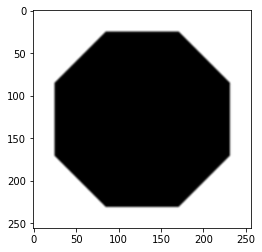

In [28]:
# Load and convert image to double type, range [0, 1] for convenience
img = cv2.imread('images/octagon.png', 0) / 255.

# Compute x, y gradients``
gx = cv2.Sobel(img, -1, dx=1, dy=0)
gy = cv2.Sobel(img, -1, dx=0, dy=1)

plt.imshow(img, cmap='binary_r')  # assumes [0, 1] range for double images

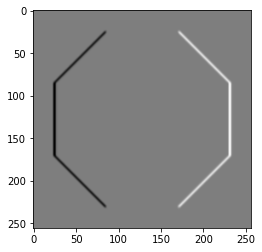

In [29]:
plt.imshow(gx, cmap='binary_r')

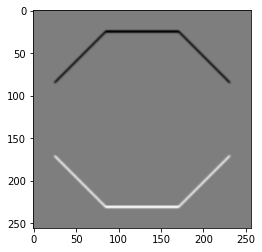

In [30]:
plt.imshow(gy, cmap='binary_r') 

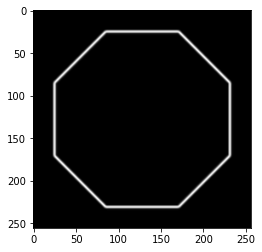

In [31]:
# The minus sign here is used based on how imgradient is implemented in octave
# See https://sourceforge.net/p/octave/image/ci/default/tree/inst/imgradient.m#l61
plt.imshow(gmag / (4 * np.sqrt(2)), cmap='binary_r')

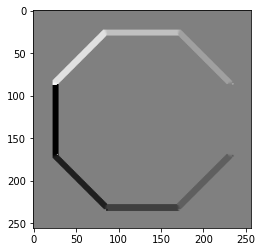

In [32]:
plt.imshow(normalize(gdir).astype(np.uint8), cmap='binary_r')

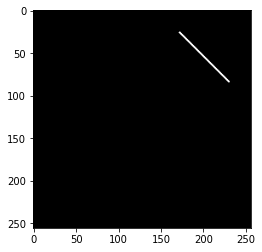

In [38]:
# Find pixels with desired gradient direction
my_grad = select_gdir(gmag, gdir, 1, 30, 60)
plt.imshow(my_grad, cmap='binary_r')